In [4]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt


In [10]:
input_shape =(28,28,1)

In [30]:
def plotData(history, metric):
    train_metrics = history.history[metric]
    validation_metrics = history.history["val_"+metric]

    epochs = range(1, len(train_metrics)+1)

    plt.plot(epochs, train_metrics)
    plt.plot(epochs, validation_metrics)

    plt.title("Training&Validation"+metric)

    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric,"val_"+metric])

    plt.show()

In [31]:
def pltLR(history):
    learning_rate = history.history["lr"]
    epochs = range(1, len(learning_rate)+1)

    plt.plot(epochs, learning_rate)

    plt.title("Learning Rate")

    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate")

    plt.show()

In [32]:
from keras.datasets import mnist

(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

print("Shape of Train Images:", train_images.shape)
print("Shape of Test Images:", test_images.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

def mnist_model(input_shape):
    model = Sequential([Conv2D(28, kernel_size =(3,3), input_shape=input_shape),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(128, activation="relu"),
                        Dropout(0.2),
                        Dense(10, activation="softmax"),
                        ])
    model.compile(
                  optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                  )
    
    return model

In [34]:
model = mnist_model(input_shape)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()

history_early_stopping = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping]
)

Epoch 1/50
750/750 - 10s - 13ms/step - accuracy: 0.8221 - loss: 1.0876 - val_accuracy: 0.9360 - val_loss: 0.2626
Epoch 2/50
750/750 - 8s - 10ms/step - accuracy: 0.9131 - loss: 0.3133 - val_accuracy: 0.9521 - val_loss: 0.2064
Epoch 3/50
750/750 - 8s - 11ms/step - accuracy: 0.9350 - loss: 0.2261 - val_accuracy: 0.9604 - val_loss: 0.1658
Epoch 4/50
750/750 - 9s - 11ms/step - accuracy: 0.9498 - loss: 0.1751 - val_accuracy: 0.9643 - val_loss: 0.1514
Epoch 5/50
750/750 - 10s - 13ms/step - accuracy: 0.9554 - loss: 0.1517 - val_accuracy: 0.9672 - val_loss: 0.1324
Epoch 6/50
750/750 - 10s - 14ms/step - accuracy: 0.9608 - loss: 0.1323 - val_accuracy: 0.9564 - val_loss: 0.1731


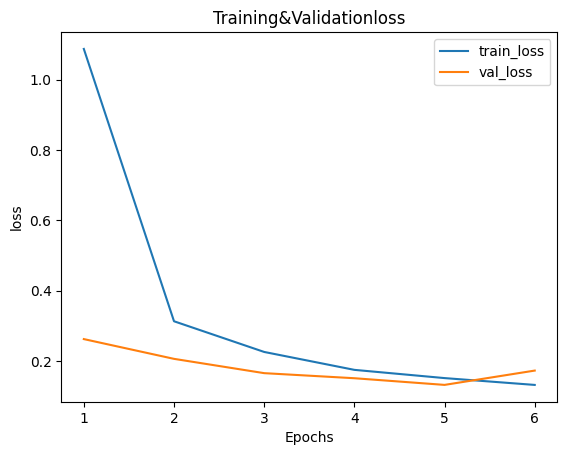

In [37]:
plotData(history_early_stopping, "loss")

In [42]:
model = mnist_model(input_shape)

early_stopping_1 = EarlyStopping(
    monitor = "vall_accuracy",
    patience = 3, #herhangi bir gelisme olms. dahi egitime +3 adim daha devam eder
    min_delta = 0.001, #kabul edebilecegi min. iyilesme orani ->0.001
    mode ="min", #auto
)

history_early_stopping_1 = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.2,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping_1]
)


Epoch 1/50


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 - 11s - 15ms/step - accuracy: 0.8274 - loss: 1.2474 - val_accuracy: 0.9197 - val_loss: 0.3273
Epoch 2/50


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `vall_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


750/750 - 9s - 12ms/step - accuracy: 0.9084 - loss: 0.3406 - val_accuracy: 0.9495 - val_loss: 0.1993
Epoch 3/50
750/750 - 10s - 13ms/step - accuracy: 0.9351 - loss: 0.2337 - val_accuracy: 0.9643 - val_loss: 0.1710
Epoch 4/50
750/750 - 10s - 13ms/step - accuracy: 0.9435 - loss: 0.1969 - val_accuracy: 0.9631 - val_loss: 0.1477
Epoch 5/50
750/750 - 10s - 13ms/step - accuracy: 0.9520 - loss: 0.1672 - val_accuracy: 0.9689 - val_loss: 0.1347
Epoch 6/50
750/750 - 9s - 12ms/step - accuracy: 0.9559 - loss: 0.1520 - val_accuracy: 0.9702 - val_loss: 0.1494
Epoch 7/50
750/750 - 9s - 12ms/step - accuracy: 0.9580 - loss: 0.1449 - val_accuracy: 0.9649 - val_loss: 0.1686
Epoch 8/50
750/750 - 9s - 12ms/step - accuracy: 0.9628 - loss: 0.1302 - val_accuracy: 0.9749 - val_loss: 0.1171
Epoch 9/50
750/750 - 10s - 13ms/step - accuracy: 0.9643 - loss: 0.1257 - val_accuracy: 0.9730 - val_loss: 0.1145
Epoch 10/50
750/750 - 9s - 12ms/step - accuracy: 0.9669 - loss: 0.1199 - val_accuracy: 0.9737 - val_loss: 0.118

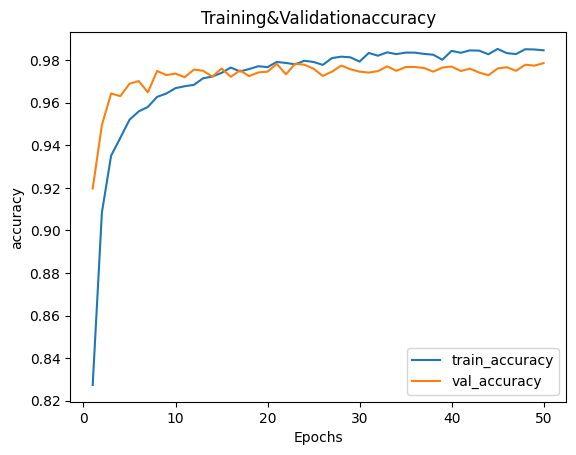

In [43]:
plotData(history_early_stopping_1,"accuracy")

In [45]:
from keras.callbacks import CSVLogger

csv = CSVLogger("logs/result.csv")
model = mnist_model(input_shape)

history_csv_logger = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 20,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [csv]
                               )

Epoch 1/20
750/750 - 12s - 16ms/step - accuracy: 0.8481 - loss: 0.8825 - val_accuracy: 0.9375 - val_loss: 0.2663
Epoch 2/20
750/750 - 10s - 13ms/step - accuracy: 0.9284 - loss: 0.2646 - val_accuracy: 0.9603 - val_loss: 0.1904
Epoch 3/20
750/750 - 9s - 13ms/step - accuracy: 0.9484 - loss: 0.1778 - val_accuracy: 0.9615 - val_loss: 0.1689
Epoch 4/20
750/750 - 9s - 13ms/step - accuracy: 0.9581 - loss: 0.1455 - val_accuracy: 0.9640 - val_loss: 0.1444
Epoch 5/20
750/750 - 10s - 14ms/step - accuracy: 0.9612 - loss: 0.1325 - val_accuracy: 0.9706 - val_loss: 0.1278
Epoch 6/20
750/750 - 9s - 12ms/step - accuracy: 0.9657 - loss: 0.1198 - val_accuracy: 0.9722 - val_loss: 0.1166
Epoch 7/20
750/750 - 10s - 13ms/step - accuracy: 0.9672 - loss: 0.1131 - val_accuracy: 0.9723 - val_loss: 0.1354
Epoch 8/20
750/750 - 8s - 10ms/step - accuracy: 0.9716 - loss: 0.0976 - val_accuracy: 0.9677 - val_loss: 0.1346
Epoch 9/20
750/750 - 8s - 10ms/step - accuracy: 0.9711 - loss: 0.1021 - val_accuracy: 0.9705 - val_l

In [50]:
%pip install pandas
%pip upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "upgrade"
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pc

pd.read_csv("logs/result.csv", index_col="epoch")

NameError: name 'pd' is not defined